In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import *
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
flight = pd.read_excel('/Users/mitssverma/Documents/DataTrainned/DataSet/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Problem Statement:**

    Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the
    same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight
    ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various
    airlines between the months of March and June of 2019 and between various cities.

**FEATURES:**
- Airline: The name of the airline.
- Date_of_Journey: The date of the journey
- Source: The source from which the service begins.
- Destination: The destination where the service ends.
- Route: The route taken by the flight to reach the destination.
- Dep_Time: The time when the journey starts from the source.
- Arrival_Time: Time of arrival at the destination.
- Duration: Total duration of the flight.
- Total_Stops: Total stops between the source and destination.
- Additional_Info: Additional information about the flight

**TARGET:**
- Price: The price of the ticket

## EDA

In [4]:
flight.shape

(10683, 11)

Shape of our dataset is 10683, 11

In [197]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Information about the dataset.**
- RangeIndex: 0 to 10682
- Total Columns: 11
- dtypes: int64(1), object(10)

In [198]:
flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**Description of Dataset:**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

In [5]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Only 2 Null values Present in our dataset.

## Data Cleaning.

**- Dropping Null Values.**

In [6]:
flight.dropna(inplace = True)

**- Dropping Duplicate Values.**

In [7]:
flight.drop_duplicates(inplace = True)

In [8]:
flight.shape

(10462, 11)

Shape of dataset after dropping values.

## Visualization.

**- Univariate Analysis.**

<AxesSubplot:xlabel='count', ylabel='Airline'>

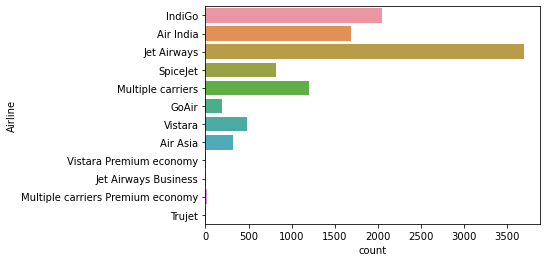

In [261]:
sns.countplot(y = flight['Airline'])

<AxesSubplot:xlabel='Date_of_Journey', ylabel='count'>

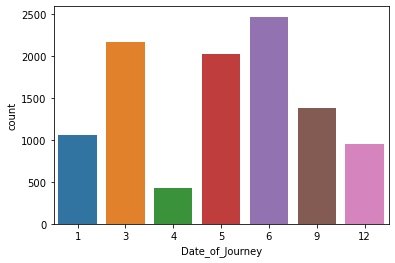

In [213]:
sns.countplot(flight['Date_of_Journey'].dt.month)

<AxesSubplot:xlabel='count', ylabel='Route'>

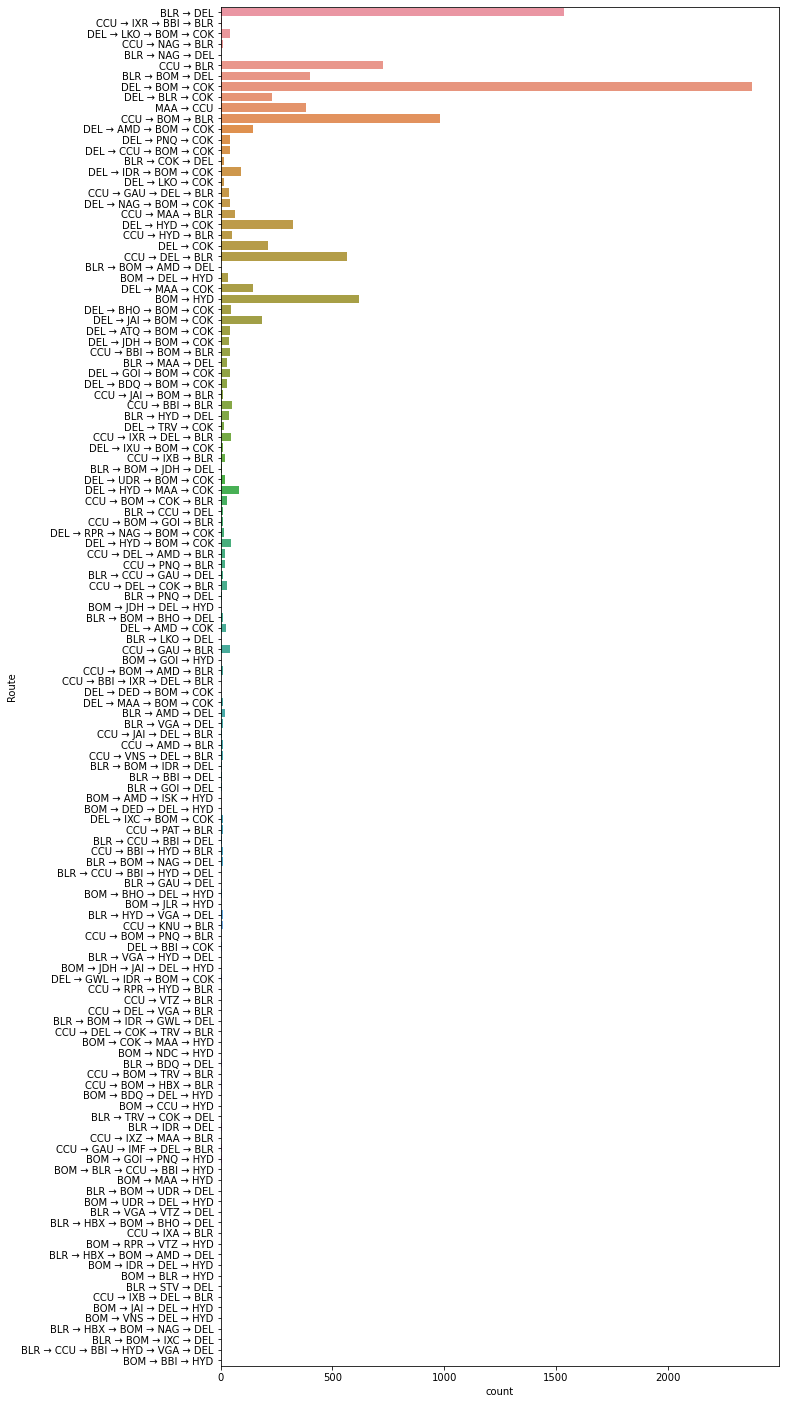

In [209]:
plt.figure(figsize=(10,25))
sns.countplot(y =flight['Route'])

**- Bivariate Analysis.**

<AxesSubplot:xlabel='Source', ylabel='Destination'>

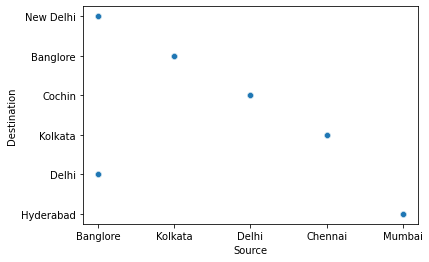

In [262]:
sns.scatterplot(x = 'Source',y = 'Destination', data = flight)

<AxesSubplot:xlabel='Airline', ylabel='Destination'>

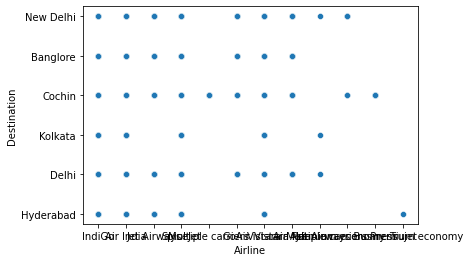

In [207]:
sns.scatterplot(x = 'Airline',y = 'Destination', data = flight)

<AxesSubplot:xlabel='Airline', ylabel='Source'>

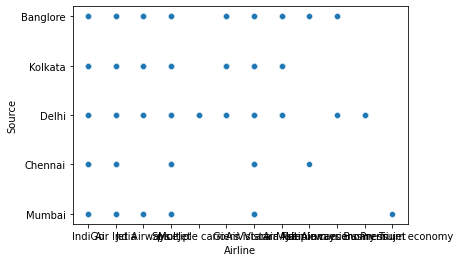

In [208]:
sns.scatterplot(x = 'Airline',y = 'Source', data = flight)

<AxesSubplot:xlabel='Source', ylabel='Price'>

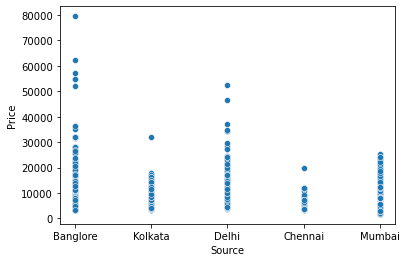

In [210]:
sns.scatterplot(x = 'Source', y = 'Price', data = flight)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

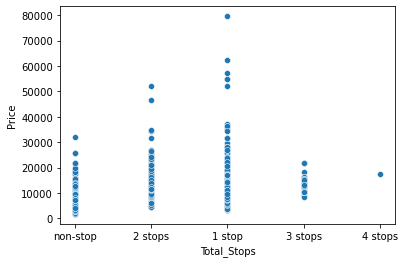

In [211]:
sns.scatterplot(x = 'Total_Stops', y = 'Price', data = flight)

<AxesSubplot:xlabel='Price', ylabel='Additional_Info'>

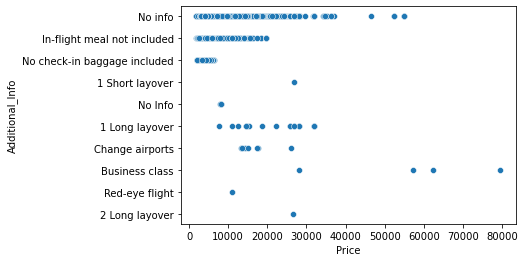

In [212]:
sns.scatterplot(y = 'Additional_Info', x = 'Price', data = flight)

<AxesSubplot:xlabel='Price', ylabel='Duration'>

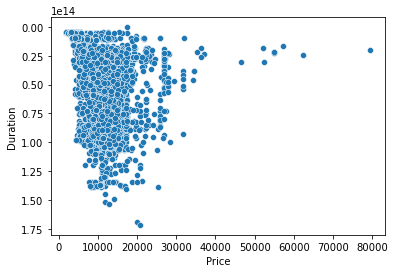

In [214]:
sns.scatterplot(x = 'Price', y = 'Duration', data = flight)

## Encoding

**- Splitting the Date of Journey columns into 2 columns, Month & Day.**

In [9]:
flight['Date_of_Journey'] = pd.to_datetime(flight['Date_of_Journey'])
flight['Month'] = flight['Date_of_Journey'].dt.month
flight['Day'] = flight['Date_of_Journey'].dt.day
flight.drop('Date_of_Journey',axis = 1,inplace = True)

**- Splitting the Dep Time columns into 2 columns, Dep_hr & Dep_min.**

In [10]:
flight['Dep_Time'] = pd.to_datetime(flight['Dep_Time']) 
flight['Dep_hr'] = flight['Dep_Time'].dt.hour
flight['Dep_min'] = flight['Dep_Time'].dt.minute
flight.drop('Dep_Time',axis = 1,inplace = True)

**- Splitting the Arrival Time columns into 2 columns, Arr_hr & Arr_min.**

In [11]:
flight['Arrival_Time'] = pd.to_datetime(flight['Arrival_Time']) 
flight['Arr_hr'] = flight['Arrival_Time'].dt.hour
flight['Arr_min'] = flight['Arrival_Time'].dt.minute
flight.drop('Arrival_Time',axis = 1,inplace = True)

**- Splitting the Duration column into Hours and Minutes.**

In [12]:
duration=list(flight['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
             duration[i]=duration[i] + ' 0m'
        else:
             duration[i]='0h '+ duration[i]

In [13]:
flight['Duration']=duration

In [14]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [15]:
flight['Dur_hour']=flight['Duration'].apply(hour)
flight['Dur_min']=flight['Duration'].apply(minutes)
flight.drop('Duration',axis = 1,inplace = True)

**- Coverting the Dur_hour & Dur_min to int type.**

In [16]:
flight['Dur_hour'] = flight['Dur_hour'].astype(int)
flight['Dur_min'] = flight['Dur_min'].astype(int)

**- Label Encoder.**

In [18]:
flight['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [19]:
flight['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [20]:
flight['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [21]:
flight['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [22]:
lb = LabelEncoder()

**- Applying Label Encoder.**

In [23]:
flight['Airline'] = lb.fit_transform(flight['Airline'])
flight['Route'] = lb.fit_transform(flight['Route'])
flight['Additional_Info'] = lb.fit_transform(flight['Additional_Info'])

**- Replacing the Values.**

In [24]:
flight['Source'] = flight['Source'].replace('Banglore',0)
flight['Source'] = flight['Source'].replace('Chennai',1)
flight['Source'] = flight['Source'].replace('Delhi',2)
flight['Source'] = flight['Source'].replace('Kolkata',3)
flight['Source'] = flight['Source'].replace('Mumbai',4)

In [25]:
flight['Destination'] = flight['Destination'].replace('Banglore',0)
flight['Destination'] = flight['Destination'].replace('Delhi',2)
flight['Destination'] = flight['Destination'].replace('Kolkata',3)
flight['Destination'] = flight['Destination'].replace('Cochin',5)
flight['Destination'] = flight['Destination'].replace('Hyderabad',6)
flight['Destination'] = flight['Destination'].replace('New Delhi',7)

In [26]:
flight['Total_Stops'] = flight['Total_Stops'].replace('non-stop',0)
flight['Total_Stops'] = flight['Total_Stops'].replace('1 stop',1)
flight['Total_Stops'] = flight['Total_Stops'].replace('2 stops',2)
flight['Total_Stops'] = flight['Total_Stops'].replace('3 stops',3)
flight['Total_Stops'] = flight['Total_Stops'].replace('4 stops',4)

In [27]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10462 non-null  int64
 1   Source           10462 non-null  int64
 2   Destination      10462 non-null  int64
 3   Route            10462 non-null  int64
 4   Total_Stops      10462 non-null  int64
 5   Additional_Info  10462 non-null  int64
 6   Price            10462 non-null  int64
 7   Month            10462 non-null  int64
 8   Day              10462 non-null  int64
 9   Dep_hr           10462 non-null  int64
 10  Dep_min          10462 non-null  int64
 11  Arr_hr           10462 non-null  int64
 12  Arr_min          10462 non-null  int64
 13  Dur_hour         10462 non-null  int64
 14  Dur_min          10462 non-null  int64
dtypes: int64(15)
memory usage: 1.3 MB


All the columns are int type.

## Normal Distribution:

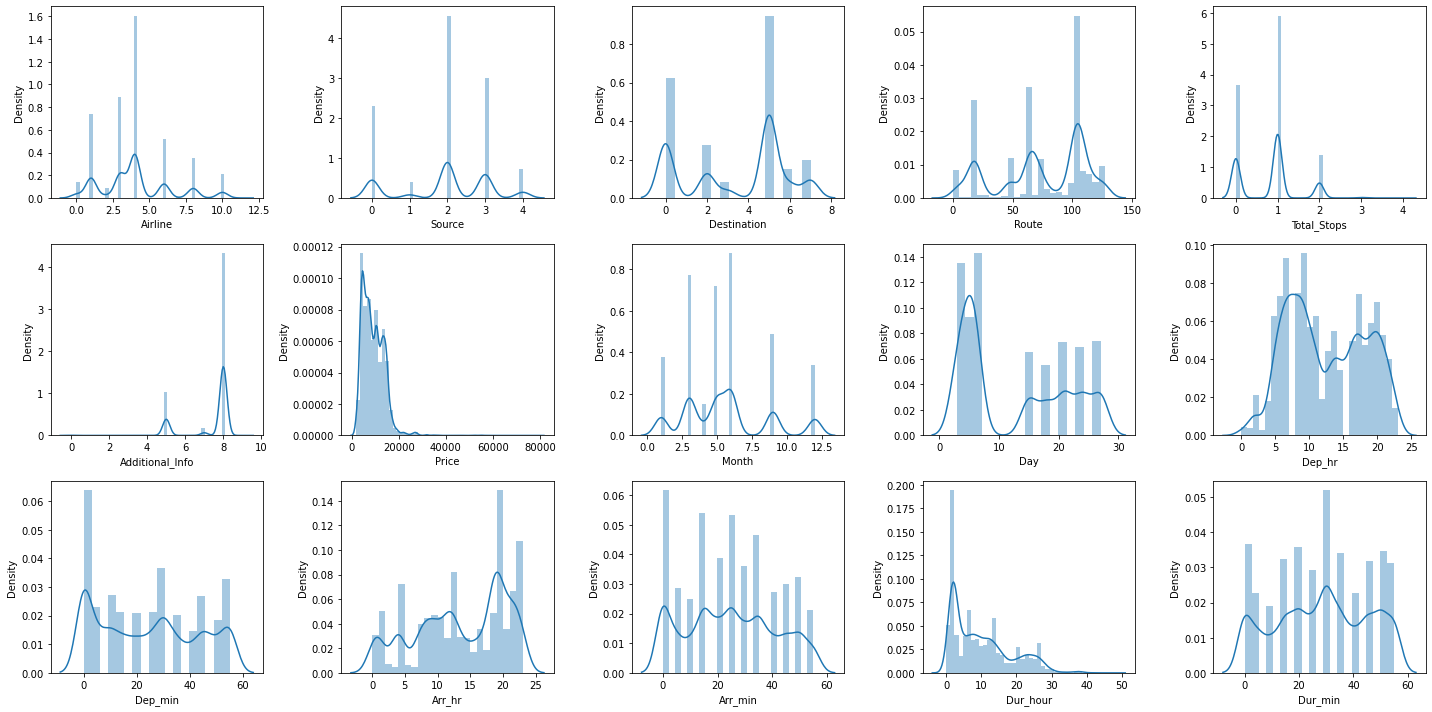

In [380]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in flight:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(flight[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

## Outliers:

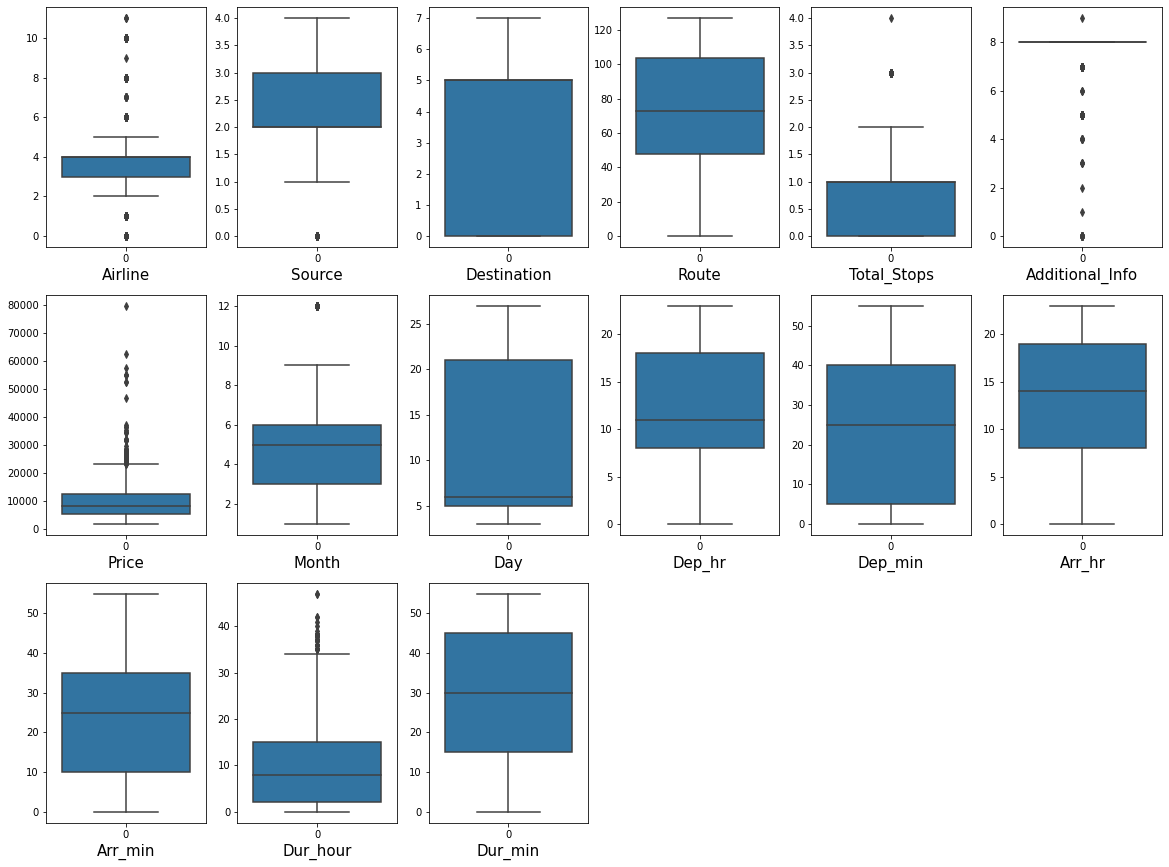

In [381]:
plt.figure(figsize = (20,15))
graph = 1
for column in flight:
    if graph <= 18:
        plt.subplot(3,6,graph)
        ax = sns.boxplot(data = flight[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

As most of the columns are categorical columns so the normal distribution. and outliers can be considered in our dataset.

## Correlation:

In [29]:
df = flight.corr()

<AxesSubplot:>

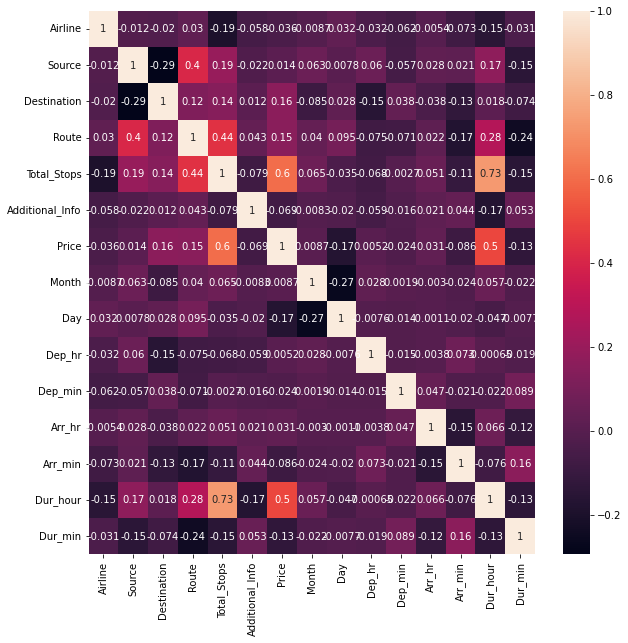

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(df,annot= True)

There is no multicolinearity problem present in our dataset.

## Best Features Selection

**- Seperating Features & Target columns.**

In [32]:
x = flight.drop('Price', axis = 1)
y = flight.Price

**- Applying SelectKBest & F_classif for the feature selection.**

In [33]:
best_feature = SelectKBest(score_func = f_classif, k =14)
fit = best_feature.fit(x,y)

In [34]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [389]:
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(14,'Scores')

,Feature Name,Scores
3,Route,246.841245
4,Total_Stops,198.590896
1,Source,182.335066
2,Destination,121.241027
0,Airline,76.694398
5,Additional_Info,52.529172
12,Dur_hour,16.096504
10,Arr_hr,4.677115
9,Dep_min,3.623397
11,Arr_min,3.455222


Features name & Score. 

**- Graph of features:**

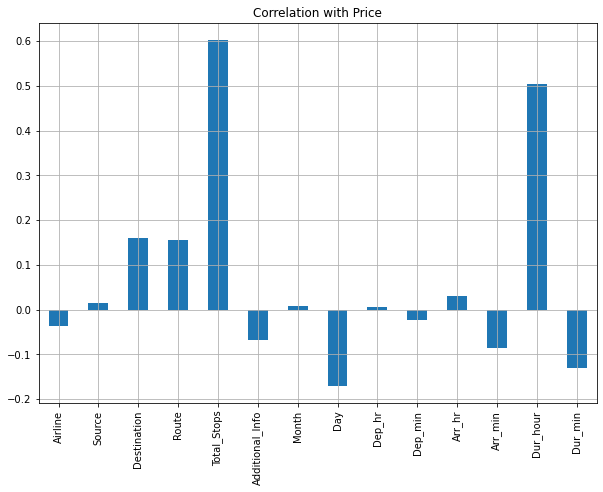

In [35]:
x.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Price')
plt.show()

    Month & Dep_hr, are the least contributing columns, So dropping these 2 columns.

In [36]:
x.drop(columns = ['Month','Dep_hr'],axis = 1,inplace = True)
x.shape

(10462, 12)

## Model Building.

**- Scaling the features.**

In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**- Train Test Split.**

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 90)

**- Function for Training & Testing.**

In [39]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))

**- Model Instantiatin.**

In [40]:
ada = AdaBoostRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()
svr = SVR()

**- AdaBoost Regressor.**

In [41]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.49368955609733667

 ----- Test Result ----- 

R2 Score: 0.5130257605410509
Mean Absolute Error: 2601.3426018740133


**- RandomForest Regressor.**

In [43]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9417048458023938

 ----- Test Result ----- 

R2 Score: 0.8021949865109903
Mean Absolute Error: 922.4413163548243


**- GradientBoosting Regressor.**

In [44]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.7949173038293506

 ----- Test Result ----- 

R2 Score: 0.8140511590505166
Mean Absolute Error: 1309.3146073511195


**- KNeighbors Regressor.**

In [45]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.8250772345773831

 ----- Test Result ----- 

R2 Score: 0.7184895936548314
Mean Absolute Error: 1238.1232680363114


**- Super Vector Regressor.**

In [46]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.03516251446589691

 ----- Test Result ----- 

R2 Score: 0.03223197513348375
Mean Absolute Error: 3564.2463844312733


        Results: RandomForest Regressor is giving the best accuracy score.

## Hyperparmeter Tuning

In [421]:
param = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

In [423]:
grid = GridSearchCV(rf, param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [47]:
rf_hyp = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 200)

In [48]:
rf_hyp.fit(x_train,y_train)
score(rf_hyp, x_train,x_test,y_train,y_test,train = True)
score(rf_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9063990506705609

 ----- Test Result ----- 

R2 Score: 0.8169887907082617
Mean Absolute Error: 914.5645379613488


    Post tuning results are better then the default parameters.

**Saving the model.**

In [107]:
filename = 'flight.pickle'
pickle.dump(rf_hyp, open(filename, 'wb'))

## Testing on the given data.

In [74]:
flight_t = pd.read_excel('/Users/mitssverma/Documents/DataTrainned/DataSet/Flight_Ticket_Participant_Datasets/Test_Set.xlsx')
flight_t.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [75]:
flight_t.shape

(2671, 10)

In [76]:
flight_t.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [77]:
flight_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [78]:
flight.drop_duplicates(inplace = True)

In [79]:
flight_t['Date_of_Journey'] = pd.to_datetime(flight_t['Date_of_Journey'])
flight_t['Month'] = flight_t['Date_of_Journey'].dt.month
flight_t['Day'] = flight_t['Date_of_Journey'].dt.day
flight_t.drop('Date_of_Journey',axis = 1,inplace = True)

In [80]:
flight_t['Dep_Time'] = pd.to_datetime(flight_t['Dep_Time']) 
flight_t['Dep_hr'] = flight_t['Dep_Time'].dt.hour
flight_t['Dep_min'] = flight_t['Dep_Time'].dt.minute
flight_t.drop('Dep_Time',axis = 1,inplace = True)

In [81]:
flight_t['Arrival_Time'] = pd.to_datetime(flight_t['Arrival_Time']) 
flight_t['Arr_hr'] = flight_t['Arrival_Time'].dt.hour
flight_t['Arr_min'] = flight_t['Arrival_Time'].dt.minute
flight_t.drop('Arrival_Time',axis = 1,inplace = True)

In [82]:
duration=list(flight_t['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
             duration[i]=duration[i] + ' 0m'
        else:
             duration[i]='0h '+ duration[i]

In [83]:
flight_t['Duration']=duration

In [84]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [85]:
flight_t['Dur_hour']=flight_t['Duration'].apply(hour)
flight_t['Dur_min']=flight_t['Duration'].apply(minutes)
flight_t.drop('Duration',axis = 1,inplace = True)

In [86]:
flight_t['Dur_hour'] = flight_t['Dur_hour'].astype(int)
flight_t['Dur_min'] = flight_t['Dur_min'].astype(int)

In [87]:
flight_t['Airline'] = lb.fit_transform(flight_t['Airline'])
flight_t['Route'] = lb.fit_transform(flight_t['Route'])
flight_t['Additional_Info'] = lb.fit_transform(flight_t['Additional_Info'])

In [88]:
flight_t['Source'] = flight_t['Source'].replace('Banglore',0)
flight_t['Source'] = flight_t['Source'].replace('Chennai',1)
flight_t['Source'] = flight_t['Source'].replace('Delhi',2)
flight_t['Source'] = flight_t['Source'].replace('Kolkata',3)
flight_t['Source'] = flight_t['Source'].replace('Mumbai',4)

In [89]:
flight_t['Destination'] = flight_t['Destination'].replace('Banglore',0)
flight_t['Destination'] = flight_t['Destination'].replace('Delhi',2)
flight_t['Destination'] = flight_t['Destination'].replace('Kolkata',3)
flight_t['Destination'] = flight_t['Destination'].replace('Cochin',5)
flight_t['Destination'] = flight_t['Destination'].replace('Hyderabad',6)
flight_t['Destination'] = flight_t['Destination'].replace('New Delhi',7)

In [90]:
flight_t['Total_Stops'] = flight_t['Total_Stops'].replace('non-stop',0)
flight_t['Total_Stops'] = flight_t['Total_Stops'].replace('1 stop',1)
flight_t['Total_Stops'] = flight_t['Total_Stops'].replace('2 stops',2)
flight_t['Total_Stops'] = flight_t['Total_Stops'].replace('3 stops',3)
flight_t['Total_Stops'] = flight_t['Total_Stops'].replace('4 stops',4)

In [91]:
flight_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int64
 1   Source           2671 non-null   int64
 2   Destination      2671 non-null   int64
 3   Route            2671 non-null   int64
 4   Total_Stops      2671 non-null   int64
 5   Additional_Info  2671 non-null   int64
 6   Month            2671 non-null   int64
 7   Day              2671 non-null   int64
 8   Dep_hr           2671 non-null   int64
 9   Dep_min          2671 non-null   int64
 10  Arr_hr           2671 non-null   int64
 11  Arr_min          2671 non-null   int64
 12  Dur_hour         2671 non-null   int64
 13  Dur_min          2671 non-null   int64
dtypes: int64(14)
memory usage: 292.3 KB


In [94]:
flight_t.drop(columns = ['Month','Dep_hr'],axis = 1,inplace = True)

In [95]:
flight_t.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day,Dep_min,Arr_hr,Arr_min,Dur_hour,Dur_min
0,4,2,5,76,1,5,6,30,4,25,10,55
1,3,3,0,65,1,5,5,20,10,20,4,0
2,4,2,5,76,1,3,21,15,19,0,23,45
3,6,2,5,76,1,5,21,0,21,0,13,0
4,0,0,2,16,0,5,24,55,2,45,2,50


In [97]:
y_pred = rf_hyp.predict(flight_t)
y_pred

array([ 8150.20915562,  7812.40049009,  8011.93873153, ...,
        8150.20915562, 10281.02630451,  8150.20915562])

In [98]:
a = []
for i in y_pred:
    a.append(i)

In [104]:
test = pd.DataFrame({'TEST' : a})
test.head(50)

,TEST
0,8150.209156
1,7812.400490
2,8011.938732
3,7944.064934
4,12017.114728
5,8150.209156
6,9858.226825
7,8160.057729
8,8157.476063
9,8160.057729
